In [2]:
import sns
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from matplotlib import pyplot
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img, load_img
from keras.layers import Reshape
from keras.models import load_model

In [3]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28, 28))
X_test = X_test.reshape((X_test.shape[0], 28, 28))
# change the type to float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# convert data to 3 channels
X_train = np.stack((X_train,)*3, axis=-1)
X_test = np.stack((X_test,)*3, axis=-1)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

C:\Users\User\AppData\Local\Temp\ipykernel_5836\3500480504.py:8: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  X_train = np.array([Image.fromarray(x).resize([224,224]) for x in X_train])


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (60000,) + inhomogeneous part.

In [ ]:
for i in range(9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i], cmap=pyplot.get_cmap('gray'))

pyplot.show()

In [4]:
model = Sequential()
# add the pretrained model
model.add(ResNet50(include_top=False, pooling='avg', weights='imagenet'))
# add fully connected layer with output
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

# set resnet layers not trainable
model.layers[0].trainable=False
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 24,641,930
Trainable params: 1,054,218
Non-trainable params: 23,587,712
_________________________________________________________________


In [41]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [50]:
model.fit(x = X_train, y= y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 142s 76ms/step - loss: 0.2188 - accuracy: 0.9168
Epoch 2/10
1875/1875 [==============================] - 145s 77ms/step - loss: 0.2060 - accuracy: 0.9216
Epoch 3/10
1875/1875 [==============================] - 141s 75ms/step - loss: 0.1981 - accuracy: 0.9242
Epoch 4/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.1887 - accuracy: 0.9278
Epoch 5/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.1788 - accuracy: 0.9313
Epoch 6/10
1875/1875 [==============================] - 145s 78ms/step - loss: 0.1758 - accuracy: 0.9336
Epoch 7/10
1875/1875 [==============================] - 145s 78ms/step - loss: 0.1649 - accuracy: 0.9371
Epoch 8/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.1636 - accuracy: 0.9373
Epoch 9/10
1875/1875 [==============================] - 143s 76ms/step - loss: 0.1540 - accuracy: 0.9398
Epoch 10/10
1875/1875 [==============================] 

In [51]:
model.save('NN/model_fashion_mnist_renet50.h5')

In [52]:
model_final = load_model('model_fashion_mnist_renet50.h5')

result = model_final.evaluate(X_test, y_test)
print(result)

313/313 [==============================] - 23s 71ms/step - loss: 0.6337 - accuracy: 0.8589
[0.6336639523506165, 0.8589000105857849]


313/313 [==============================] - 21s 68ms/step


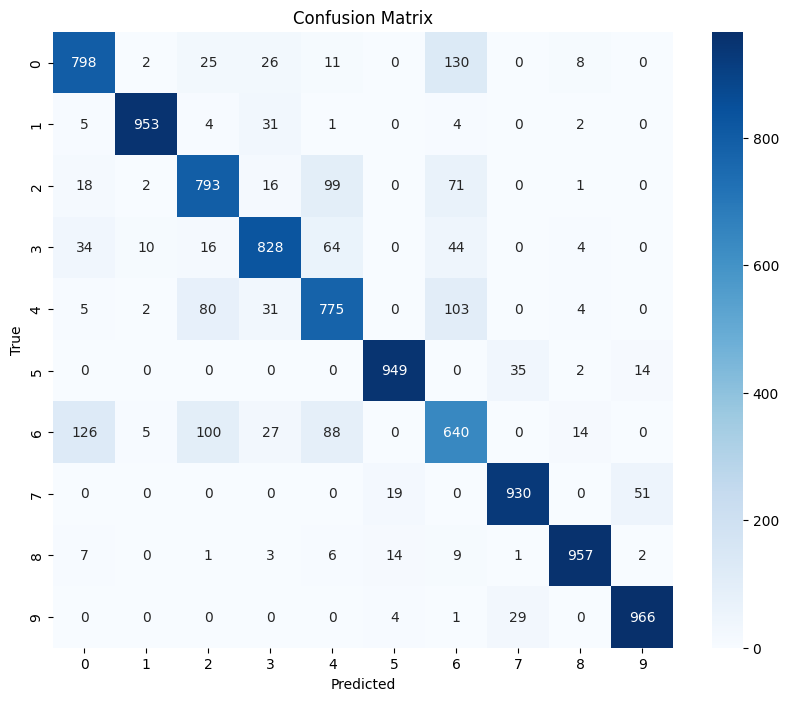

In [55]:
from sklearn.metrics import confusion_matrix

from matplotlib import pyplot as plt
import seaborn as sns

y_pred = np.argmax(model_final.predict(X_test), axis=1)

# Macierz pomyłek
conf_mat = confusion_matrix(np.argmax(y_test, axis=1), y_pred)

# Wyświetlenie macierzy pomyłek
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()